# Setup

In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent); os.chdir(set_path)

In [2]:
import torch
import matplotlib.pyplot as plt
from FittedModels.utils import plot_distributions
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from TargetDistributions.BayesianNN import PosteriorBNN
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils import plot_distributions, plot_history
from FittedModels.train import LearntDistributionManager
from Utils import plot_func2D, MC_estimate_true_expectation

### Expectation Function

In [3]:
def expectation_function(x):
    A = torch.ones((x.shape[-1], x.shape[-1]))
    return torch.einsum("bi,ij,bj->b", x, A, x)

# Specifiy target distribution and key param

In [7]:
epochs = 50
n_samples_estimation = int(1e4)
#target = PosteriorBNN(n_datapoints=10, x_dim=2, y_dim=2, n_hidden_layers=2, layer_width=5)
target = PosteriorBNN(n_datapoints=10, x_dim=2, y_dim=1, n_hidden_layers=1, layer_width=1)
dim = target.n_parameters

# DReG
Let's instantiate a flow based model, and train using DReG

In [30]:
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=3)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG")
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

In [31]:
history = tester.train(200, batch_size=100)
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

loss: -145.374755859375, mean log p_x -135.98585510253906: 100%|█████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:43<00:00,  4.57it/s]


NaN encountered in loss history
NaN encountered in log_p_x history
NaN encountered in log_q_x history


(<Figure size 432x720 with 3 Axes>,
 array([<AxesSubplot:title={'center':'loss'}>,
        <AxesSubplot:title={'center':'log_p_x'}>,
        <AxesSubplot:title={'center':'log_q_x'}>], dtype=object))

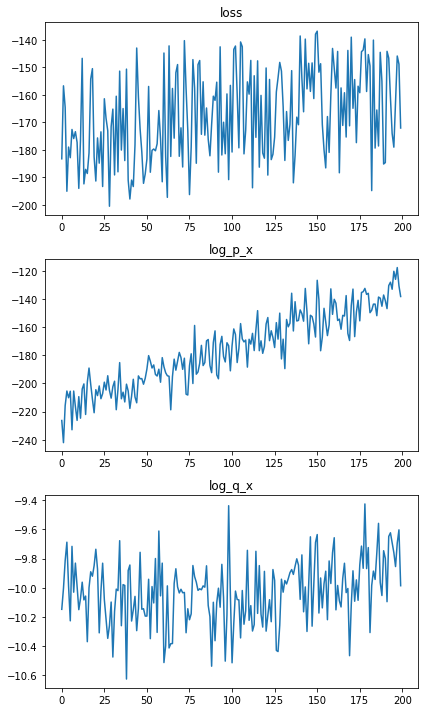

In [32]:
plot_history(history)

In [33]:
print(f"info_before is {info_before['effective_sample_size']}")

info_before is 29.418903350830078


In [34]:
print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size is {info['effective_sample_size']} \n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

estimate before training is 7.171765327453613 
estimate after training is 3.63065767288208 
effective sample size is 67.10802459716797 
variance in weights is 1.4802828900428722e-06


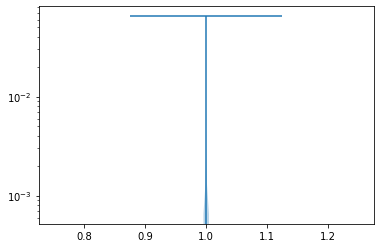

In [35]:
plt.violinplot([info['normalised_sampling_weights']])
plt.yscale("log")

In [ ]:
plt.plot(history["loss"])

# KL

In [ ]:
learnt_sampler = FlowModel(x_dim=dim)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="kl")
expectation_before, sampling_weights_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

In [ ]:
history = tester.train(epochs)
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size is {info['effective_sample_size']} \n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

In [ ]:
plt.violinplot([info['normalised_sampling_weights']])
plt.yscale("log")

In [ ]:
plt.plot(history["loss"])

# Gaussain

In [ ]:
epochs = 500
n_samples_estimation = int(1e4)
target = PosteriorBNN(n_datapoints=1, x_dim=1, y_dim=1, n_hidden_layers=1, layer_width=2)
dim = target.n_parameters

In [ ]:
from FittedModels.Models.DiagonalGaussian import DiagonalGaussian

In [ ]:
n_samples_estimation = int(1e4)
learnt_sampler = DiagonalGaussian(dim=dim)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG")

In [ ]:
history = tester.train(epochs)

In [ ]:
plot_history(history)